In [14]:

import scipy as sp
from scipy.spatial.distance import squareform, pdist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold

# para testes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss, accuracy_score

#graficos
import matplotlib.pyplot as plt
%matplotlib inline



dfac = pd.read_csv('dados/mfeat-fac', delim_whitespace=True, header=None)
dfou = pd.read_csv('dados/mfeat-fou', delim_whitespace=True, header=None)
dkar = pd.read_csv('dados/mfeat-kar', delim_whitespace=True, header=None)
#dmor = pd.read_csv('dados/mfeat-mor', delim_whitespace=True, header=None)
#dpix = pd.read_csv('dados/mfeat-pix', delim_whitespace=True, header=None)
#dzer = pd.read_csv('dados/mfeat-zer', delim_whitespace=True, header=None)

#cria as classes de 0-9
classes = np.array([])
for i in range (2000):
    classes = np.append(classes,int(i/200))
classes[198:203]

array([ 0.,  0.,  1.,  1.,  1.])

In [15]:
s = []
saida = ""
# 30 rodadas 

for i in range(30):
    # Shuffle examples
    dados, classesEmbaralhadas = shuffle(dfac, classes, random_state=i)

    # 10 folds
    skf = StratifiedKFold(10)
    

    
    for indicesTreino, indicesTeste in skf.split(dados, classesEmbaralhadas):
        dadosTreino = dfac.loc[indicesTreino]
        dadosTeste  = dfac.loc[indicesTeste]        
        classesTreino = classes[indicesTreino]
        classesTeste  = classes[indicesTeste] 
                                    
        # teste com KNN (apenas teste - substituir pelo classificador solicitaco na questao)        
        # Constrói um classificador knn e treina ele com dados da visão 2
        clf_knn2 = KNeighborsClassifier(n_neighbors=5) # cria o classificador
        clf_knn2.fit(dadosTreino, classesTreino)       # treina
        knn2_pred = clf_knn2.predict(dadosTeste)       # faz o teste
        #err_knn2 = zero_one_loss(classesTeste, knn2_pred)    # computa o resultado - taxa de erro
        err_knn2 = accuracy_score(classesTeste, knn2_pred)    # computa o resultado - taxa de acerto
        s.append(err_knn2)
        saida = saida + str(err_knn2) + ", "
        
        
    #TODO    
    #    treinar classificador
    #    testar 
    #    salvar resutado
print(saida)
# achar media dos resultados
# achar intervalo de confiança


0.195, 0.775, 0.905, 0.805, 0.895, 0.765, 0.915, 0.86, 0.59, 0.525, 0.205, 0.655, 0.865, 0.71, 0.75, 0.705, 0.875, 0.82, 0.505, 0.475, 0.51, 0.845, 0.93, 0.92, 0.935, 0.865, 0.94, 0.885, 0.53, 0.395, 0.185, 0.75, 0.88, 0.85, 0.905, 0.78, 0.915, 0.835, 0.46, 0.37, 0.21, 0.795, 0.915, 0.785, 0.885, 0.64, 0.93, 0.87, 0.545, 0.57, 0.425, 0.88, 0.93, 0.865, 0.92, 0.865, 0.945, 0.905, 0.735, 0.545, 0.45, 0.825, 0.935, 0.785, 0.78, 0.67, 0.905, 0.85, 0.31, 0.33, 0.245, 0.735, 0.915, 0.81, 0.9, 0.78, 0.865, 0.805, 0.29, 0.4, 0.33, 0.825, 0.925, 0.805, 0.93, 0.79, 0.895, 0.865, 0.535, 0.485, 0.45, 0.835, 0.905, 0.86, 0.925, 0.77, 0.905, 0.915, 0.535, 0.5, 0.455, 0.82, 0.955, 0.895, 0.905, 0.88, 0.905, 0.93, 0.605, 0.505, 0.485, 0.805, 0.91, 0.87, 0.91, 0.8, 0.93, 0.89, 0.63, 0.48, 0.18, 0.8, 0.925, 0.89, 0.9, 0.75, 0.89, 0.84, 0.56, 0.565, 0.355, 0.765, 0.89, 0.775, 0.93, 0.865, 0.89, 0.905, 0.66, 0.55, 0.41, 0.845, 0.915, 0.8, 0.925, 0.83, 0.895, 0.855, 0.615, 0.48, 0.47, 0.735, 0.925, 0.83, 0

In [16]:
print("resultados: "+ str(len(s)))

resultados: 300


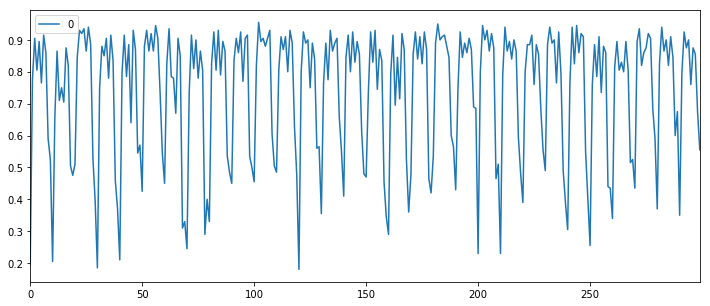

In [18]:
pd_s = pd.DataFrame(s)
pd_s.plot(figsize=(12,5))